In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import EpiClockInvasiveBRCA.src.util as epi_util
from EpiClockInvasiveBRCA.src.consts import consts as epi_consts

proj_dir = os.path.join(consts['official_indir'], 'Aurora')

# sample map

In [2]:
# Figure parameters

# scale factor
sf = 0.4

square_figsize = np.array([5, 4])
figsize = np.array([9, 7])
labelfontsize = 25
ticksfontsize = 18
opacity = 0.8
s = 30

sns.set(rc={"savefig.bbox":'tight', 'axes.linewidth':sf}, font_scale=1, style='ticks')

In [4]:
beta_values = pd.read_table(os.path.join(proj_dir, 'GSE212370_20220828_MethylationEPIC_GEO_data_matrix146.tsv'), index_col=0)
beta_values = beta_values.rename(columns=lambda x:'-'.join(x.split('-')[:6]))

# Clock_CpGs = np.loadtxt(os.path.join(epi_consts['repo_dir'], 'Select_fCpGs', 'outputs', 'balanced_CpGs.txt'), dtype=str)

In [5]:
sample_map = pd.read_table(os.path.join(proj_dir, 'sample_map.txt'), index_col=0)

In [8]:
most_random_sites_850k = np.intersect1d(beta_values.index, most_random_sites)

In [9]:
most_random_sites = np.loadtxt('/Users/danielmonyak/Desktop/most_random_sites.txt', dtype=str)
beta_values_Clock = beta_values.loc[most_random_sites_850k]

In [11]:
patient_list = np.loadtxt(os.path.join(proj_dir, 'patients_bothSamplesPure.txt'), dtype=str)

In [14]:
samps = sample_map.index[sample_map['Patient'].isin(patient_list) & (sample_map['Sample Type'] == 'Metastasis')].values

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [117]:
patient_map = pd.DataFrame({'Patient':patient_list, 'Primary':prim_list, 'Metastasis':met_list})

In [58]:
c_beta = 1 - beta_values_Clock.std(axis=0)
c_beta_table_by_patient = patient_map.copy()
c_beta_table_by_patient['Primary'] = c_beta_table_by_patient['Primary'].map(c_beta)
c_beta_table_by_patient['Metastasis'] = c_beta_table_by_patient['Metastasis'].map(c_beta)

In [95]:
LUMP_table_by_patient = patient_map.copy()
LUMP_table_by_patient['Primary'] = LUMP_table_by_patient['Primary'].map(sample_annotations['LUMP'])
LUMP_table_by_patient['Metastasis'] = LUMP_table_by_patient['Metastasis'].map(sample_annotations['LUMP'])

In [77]:
sample_type_counts = sample_annotations.loc[sample_annotations['pure']].groupby('Patient')['Sample Type'].value_counts().unstack().fillna(0)

In [92]:
sample_annotations.loc[sample_annotations['Patient'] == 'AER6', ['Sample Type', 'c_beta', 'LUMP']]
# .groupby('Sample Type')['c_beta']

,Sample Type,c_beta,LUMP
BCR Portion barcode,,,
AUR-AER6-TTP1-A-1-0,Primary,0.800910,0.767980
AUR-AER6-TTM9-A-1-1,Metastasis,0.812855,0.735000
AUR-AER6-TTM7-A-1-1,Metastasis,0.850862,0.703186
AUR-AER6-TTM6-A-1-1,Metastasis,0.818028,0.862194
AUR-AER6-TTM5-A-1-1,Metastasis,0.815466,0.868112
AUR-AER6-TTM3-A-1-1,Metastasis,0.846284,0.606645
AUR-AER6-TTM2-A-1-1,Metastasis,0.788848,0.953845
AUR-AER6-TTM10-A-1-1,Metastasis,0.803145,0.791095
AUR-AER6-TTM1-A-1-1,Metastasis,0.852565,0.577972


In [1]:
sample_type_counts.shape

NameError: name 'sample_type_counts' is not defined

Text(0.9323691452886778, 0.6646111728626131, 'Primary older')

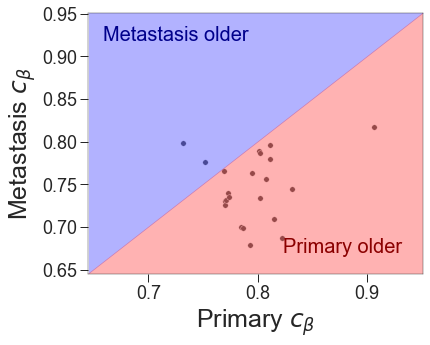

In [64]:
sf = 1

fig, ax = plt.subplots(figsize=square_figsize * 1.2 * sf)

pts_range = (c_beta_table_by_patient.min().min()*0.95, c_beta_table_by_patient.max().max()*1.05)

pts_arr = np.linspace(pts_range[0], pts_range[1], 100)

sns.scatterplot(ax=ax, data=c_beta_table_by_patient, x='Primary', y='Metastasis', color='dimgray',
               s=s * sf)

ax.set_xlim(pts_range[0], pts_range[1])
ax.set_ylim(pts_range[0], pts_range[1])

ax.fill_between(pts_range, pts_range, 1, alpha=0.3, color='blue', lw=0)
ax.fill_between(pts_range, 0, pts_range, alpha=0.3, color='red', lw=0)

ax.set_xlabel(ax.get_xlabel().capitalize() + ' $c_β$', fontsize=labelfontsize * sf)
ax.set_ylabel(ax.get_ylabel().capitalize() + ' $c_β$', fontsize=labelfontsize * sf)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

ax.text(pts_range[0]*1.02, pts_range[1]*0.96, 'Metastasis older',
        ha="left", va="bottom", fontfamily='sans-serif', color='darkblue',
        fontsize=labelfontsize * 0.8 * sf)
ax.text(pts_range[1]*0.98, pts_range[0]*1.03, 'Primary older',
        ha="right", va="bottom", fontfamily='sans-serif', color='darkred',
        fontsize=labelfontsize * 0.8 * sf)


Text(1.029, 0.653950652433336, 'Primary older')

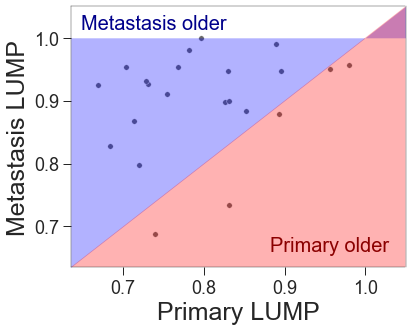

In [96]:
sf = 1

fig, ax = plt.subplots(figsize=square_figsize * 1.2 * sf)

pts_range = (LUMP_table_by_patient.min().min()*0.95, LUMP_table_by_patient.max().max()*1.05)

pts_arr = np.linspace(pts_range[0], pts_range[1], 100)

sns.scatterplot(ax=ax, data=LUMP_table_by_patient, x='Primary', y='Metastasis', color='dimgray',
               s=s * sf)

ax.set_xlim(pts_range[0], pts_range[1])
ax.set_ylim(pts_range[0], pts_range[1])

ax.fill_between(pts_range, pts_range, 1, alpha=0.3, color='blue', lw=0)
ax.fill_between(pts_range, 0, pts_range, alpha=0.3, color='red', lw=0)

ax.set_xlabel(ax.get_xlabel().capitalize() + ' LUMP', fontsize=labelfontsize * sf)
ax.set_ylabel(ax.get_ylabel().capitalize() + ' LUMP', fontsize=labelfontsize * sf)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

ax.text(pts_range[0]*1.02, pts_range[1]*0.96, 'Metastasis older',
        ha="left", va="bottom", fontfamily='sans-serif', color='darkblue',
        fontsize=labelfontsize * 0.8 * sf)
ax.text(pts_range[1]*0.98, pts_range[0]*1.03, 'Primary older',
        ha="right", va="bottom", fontfamily='sans-serif', color='darkred',
        fontsize=labelfontsize * 0.8 * sf)


LinregressResult(slope=0.22895545062434378, intercept=0.023474028148528624, rvalue=0.4900972451364736, pvalue=0.020586950291931427, stderr=0.09105519167736945, intercept_stderr=0.013004532078437788)

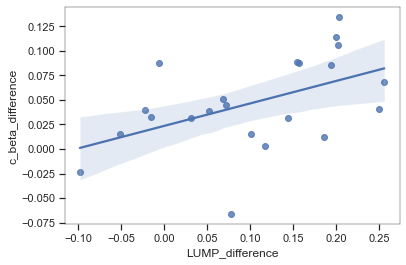

In [109]:
df = pd.concat([
    (c_beta_table_by_patient['Primary'] - c_beta_table_by_patient['Metastasis']).rename('c_beta_difference'),
    (LUMP_table_by_patient['Metastasis'] - LUMP_table_by_patient['Primary']).rename('LUMP_difference')
], axis=1)
sns.regplot(data=df, x='LUMP_difference', y='c_beta_difference')
epi_util.pearsonCorrelation(df['LUMP_difference'], df['c_beta_difference'], )

In [67]:
sample_annotations['c_beta'] = c_beta

In [70]:
epi_util.getCorrelation(sample_annotations, 'Percent lymphocyte infiltration', 'c_beta')

LinregressResult(slope=33.871203355169435, intercept=-22.26879544879271, rvalue=0.19072947063208295, pvalue=0.036918560388547336, stderr=16.04815953940742, intercept_stderr=12.481271354198565)

In [72]:
epi_util.getCorrelation(sample_annotations, 'Percent stromal cells', 'c_beta')

LinregressResult(slope=42.882364447268984, intercept=-5.335148841788879, rvalue=0.07296047280841392, pvalue=0.4284000013507483, stderr=53.962376495124786, intercept_stderr=41.96861716754523)

In [73]:
epi_util.getCorrelation(sample_annotations, 'LUMP', 'c_beta')

LinregressResult(slope=-1.619605057005795, intercept=2.0482129135792895, rvalue=-0.4576018563143397, pvalue=3.9067485669029126e-08, stderr=0.27707991455913594, intercept_stderr=0.21583241885586352)

In [74]:
epi_util.getCorrelation(sample_annotations, 'Proliferation Score', 'c_beta')

LinregressResult(slope=-3.0467033929141523, intercept=2.526894557602268, rvalue=-0.3106043312150075, pvalue=0.0016599114475793933, stderr=0.9418455835240147, intercept_stderr=0.7353413778091267)